In [64]:
# Load data with python pandas.
import pandas as pd
file_name = "dataport-export_gas_oct2015-mar2016.csv"
df = pd.read_csv(file_name)
df.head(20)

,localminute,dataid,meter_value
0,2015-10-01 00:00:10-05,739,88858
1,2015-10-01 00:00:13-05,8890,197164
2,2015-10-01 00:00:20-05,6910,179118
3,2015-10-01 00:00:22-05,3635,151318
4,2015-10-01 00:00:22-05,1507,390354
5,2015-10-01 00:00:29-05,5810,97506
6,2015-10-01 00:01:00-05,484,99298
7,2015-10-01 00:01:18-05,6910,179118
8,2015-10-01 00:01:34-05,6910,179118
9,2015-10-01 00:01:38-05,5810,97506


In [2]:
# check the numbers of rows and columns
print("Numbers of rows and columns for the data : ",df.shape)

Numbers of rows and columns for the data :  (1584823, 3)


In [3]:
# Q1-1  : How many houses are including in this dataset.
num_houses = len(df['dataid'].value_counts())
print("Numbers of Registered Houses = ",num_houses)

Numbers of Registered Houses =  157


In [4]:
#  Check the malfunctioning meter values.
# Total missing values for each feature
df.isnull().sum()

localminute    0
dataid         0
meter_value    0
dtype: int64

In [5]:
df['meter_value'].describe()

count    1.584823e+06
mean     2.015056e+05
std      1.351182e+05
min      2.829800e+04
25%      1.145800e+05
50%      1.670940e+05
75%      2.364940e+05
max      8.158240e+05
Name: meter_value, dtype: float64

In [6]:
# Q1-2 : Generating hourly readings from  the row data.
month_list = []
for i in range(df.shape[0]):
    month_list.append(df['localminute'][i][0:7])
print(len(month_list))

1584823


In [7]:
df['localminute'].min(), df['localminute'].max()

('2015-10-01 00:00:10-05', '2016-03-31 23:59:58.92308-05')

In [65]:
# Reformatting the datetime column to the year/month 
df['year_month'] = month_list
df.head()

,localminute,dataid,meter_value,year_month
0,2015-10-01 00:00:10-05,739,88858,2015-10
1,2015-10-01 00:00:13-05,8890,197164,2015-10
2,2015-10-01 00:00:20-05,6910,179118,2015-10
3,2015-10-01 00:00:22-05,3635,151318,2015-10
4,2015-10-01 00:00:22-05,1507,390354,2015-10


In [66]:
# Test the range of year/month values
print("unique months of data : ",df['year_month'].unique())

unique months of data :  ['2015-10' '2015-11' '2015-12' '2016-01' '2016-02' '2016-03']


In [67]:
# Select one month data from the raw data.
sub_month_data = df[df.year_month == '2016-03']
sub_month_data.head()

,localminute,dataid,meter_value,year_month
1357429,2016-03-01 00:00:18.648104-06,7429,148086,2016-03
1357430,2016-03-01 00:00:22.253039-06,2018,230402,2016-03
1357431,2016-03-01 00:00:35.314561-06,871,121344,2016-03
1357432,2016-03-01 00:01:00.478993-06,7016,311462,2016-03
1357433,2016-03-01 00:01:06.913277-06,3893,104412,2016-03


In [11]:
# Make new data containing meter_values for the unique dataid 
df_new = sub_month_data.groupby('dataid')['meter_value'].mean().reset_index()
df_new.head()

,dataid,meter_value
0,35,103969.188834
1,44,175069.666667
2,77,64085.012153
3,94,139146.497295
4,114,144674.379167


In [68]:
# find the house id that have the most consumption of gas
print("The house_id  having the most consumption of gas : ")
df_new[df_new.meter_value == df_new['meter_value'].max()]

The house_id  having the most consumption of gas : 


,dataid,meter_value
90,5814,815278.17428


In [70]:
# find the house id that have the least consumption of gas
print("The house_id having the minimum consumption of gas : ")
df_new[df_new.meter_value == df_new['meter_value'].min()]

The house_id having the minimum consumption of gas : 


,dataid,meter_value
138,9849,38809.704545


In [14]:
sub_month_data = sub_month_data.reset_index(drop=True)
sub_month_data.head()

,localminute,dataid,meter_value,year_month
0,2016-03-01 00:00:18.648104-06,7429,148086,2016-03
1,2016-03-01 00:00:22.253039-06,2018,230402,2016-03
2,2016-03-01 00:00:35.314561-06,871,121344,2016-03
3,2016-03-01 00:01:00.478993-06,7016,311462,2016-03
4,2016-03-01 00:01:06.913277-06,3893,104412,2016-03


In [15]:
hourly_list = []
for i in range(sub_month_data.shape[0]):
    hourly_list.append(sub_month_data['localminute'][i][8:13])
print(len(hourly_list))

227394


In [28]:
hourly_list[0]

'01 00'

In [34]:
hourly_df = sub_month_data[['dataid','meter_value']]
hourly_df['hourly_time']=hourly_list
hourly_df.head()

C:\Users\86171\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dataid,meter_value,hourly_time
0,7429,148086,01 00
1,2018,230402,01 00
2,871,121344,01 00
3,7016,311462,01 00
4,3893,104412,01 00


In [35]:
hourly_df_7429 = hourly_df[hourly_df.dataid==7429].groupby(['hourly_time'])['meter_value'].max()
hourly_df_2018 = hourly_df[hourly_df.dataid==2018].groupby(['hourly_time'])['meter_value'].max()
hourly_df_871 = hourly_df[hourly_df.dataid==871].groupby(['hourly_time'])['meter_value'].max()
hourly_df_7429

hourly_time
01 00    148086
01 01    148086
01 03    148086
01 04    148086
01 05    148086
01 06    148086
01 07    148086
01 08    148094
01 09    148094
01 10    148098
01 12    148122
01 13    148122
01 14    148122
01 15    148122
01 16    148122
01 17    148122
01 18    148122
01 20    148122
01 21    148142
01 22    148142
01 23    148142
02 00    148142
02 01    148142
02 02    148142
02 04    148142
02 05    148142
02 06    148142
02 07    148152
02 08    148152
02 09    148162
          ...  
30 15    149370
30 16    149370
30 17    149370
30 18    149370
30 19    149370
30 20    149374
30 21    149374
30 22    149374
30 23    149374
31 01    149374
31 02    149374
31 03    149374
31 05    149374
31 06    149374
31 07    149374
31 08    149380
31 09    149380
31 10    149384
31 11    149388
31 12    149388
31 13    149388
31 14    149388
31 15    149388
31 16    149388
31 17    149388
31 18    149388
31 20    149392
31 21    149392
31 22    149392
31 23    149392
Name: meter_

    ****   Gas Consumption values for the house(id = 7429)   ****  


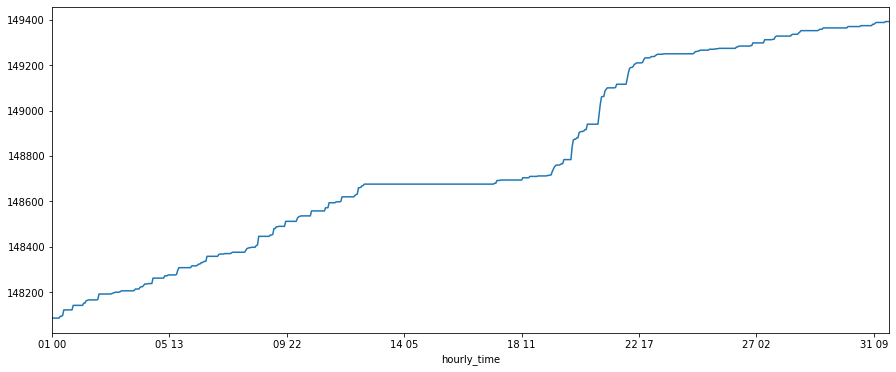

In [37]:
import matplotlib.pyplot as plt
print("    ****   Gas Consumption values for the house(id = 7429)   ****  ")
hourly_df_7429.plot(figsize=(15, 6))
plt.show()

    ****   Gas Consumption values for the house(id = 871)   ****  


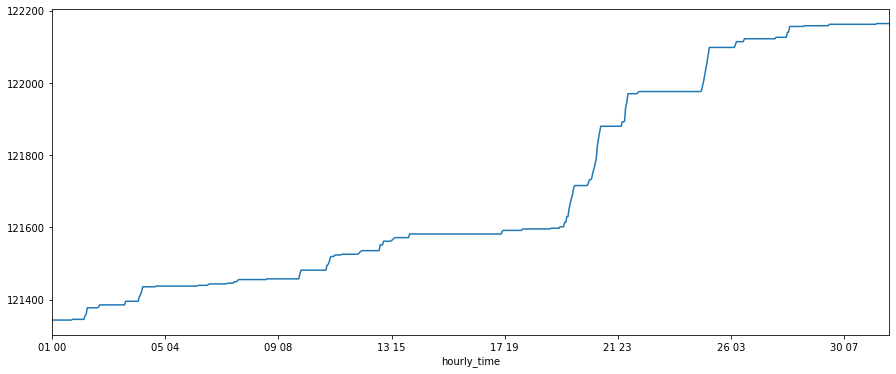

In [38]:
import matplotlib.pyplot as plt
print("    ****   Gas Consumption values for the house(id = 871)   ****  ")
hourly_df_871.plot(figsize=(15, 6))
plt.show()

In [76]:
df_id = pd.DataFrame()
hours = hourly_df['hourly_time'].unique()
for id in hourly_df['dataid'].unique():
    hourly_df_id = hourly_df[hourly_df.dataid==id].groupby(['hourly_time'])['meter_value'].max()
    df_id[id] = hourly_df_id
df_id

,7429,2018,871,7016,3893,8467,6673,1718,2034,252,...,4352,6685,6863,5545,44,5658,7965,9620,4874,8703
hourly_time,,,,,,,,,,,,,,,,,,,,,
01 00,148086,230402.0,121344.0,311462.0,104412.0,95330.0,84104.0,179060.0,84292,349096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 01,148086,230402.0,121344.0,NaN,104412.0,NaN,84104.0,179060.0,84292,349096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 03,148086,230414.0,121344.0,311464.0,104414.0,95330.0,84106.0,179060.0,84294,349098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 04,148086,NaN,121344.0,NaN,104414.0,95330.0,84106.0,179060.0,84294,349098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 05,148086,230414.0,121344.0,311464.0,104414.0,95330.0,84106.0,179062.0,84294,349098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 06,148086,230426.0,121344.0,311466.0,104416.0,95336.0,84106.0,179062.0,84296,349120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 07,148086,NaN,121344.0,NaN,104416.0,95340.0,84114.0,179066.0,84296,349120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 08,148094,230442.0,121344.0,311484.0,104432.0,95350.0,84124.0,179080.0,84298,349122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01 09,148094,NaN,121344.0,311484.0,104432.0,95350.0,84128.0,179082.0,84298,349122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_id_cut = df_id[[7429,2018,871,7016,3893,8467,6673,1718,2034,252]]
df_id_cut.head()

,7429,2018,871,7016,3893,8467,6673,1718,2034,252
hourly_time,,,,,,,,,,
01 00,148086,230402.0,121344.0,311462.0,104412.0,95330.0,84104.0,179060.0,84292,349096.0
01 01,148086,230402.0,121344.0,NaN,104412.0,NaN,84104.0,179060.0,84292,349096.0
01 03,148086,230414.0,121344.0,311464.0,104414.0,95330.0,84106.0,179060.0,84294,349098.0
01 04,148086,NaN,121344.0,NaN,104414.0,95330.0,84106.0,179060.0,84294,349098.0
01 05,148086,230414.0,121344.0,311464.0,104414.0,95330.0,84106.0,179062.0,84294,349098.0


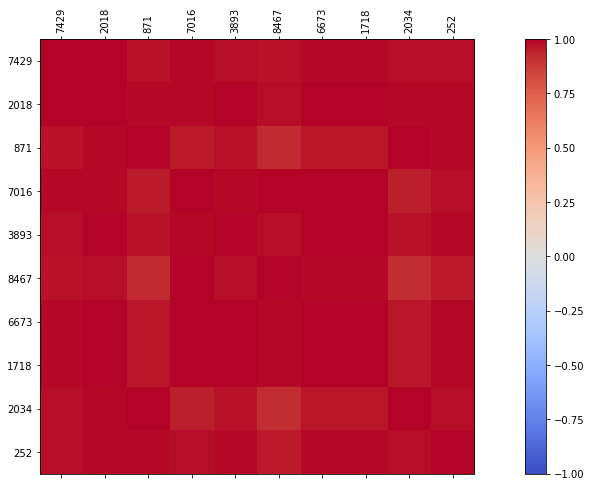

In [63]:
import numpy as np
corr = df_id_cut.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_id_cut.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_id_cut.columns)
ax.set_yticklabels(df_id_cut.columns)
plt.show()